In [2]:
import os
import json
from IPython.display import display, Markdown
import pandas as pd


In [21]:
df_2 = pd.read_csv('outputs/vlg_cbm_faithfulness.csv')
df_1 = pd.read_csv('outputs/vlg_cbm_v3.csv')
# vlg_df = pd.read_csv('outputs/vlg_cbm_faithfulness.csv')
# lf_df = pd.read_csv('outputs/cub_lf_cbm_faithfulness.csv')

In [15]:
for df in [df_1,df_2]:
    display(df.describe())
    df_non_empty=df[df["saliency_capture"]!=0]
    display(1-df_non_empty["iou"].count()/len(df))
    display(df_non_empty.describe())

,target_neuron,iou,saliency_ratio,saliency_capture
count,480.000000,480.000000,480.000000,480.000000
mean,239.500000,0.186240,1.217042,0.213364
std,138.708327,0.146455,0.503697,0.185205
min,0.000000,0.000000,0.000000,0.000000
25%,119.750000,0.041909,0.939683,0.046182
50%,239.500000,0.176869,1.353857,0.181212
75%,359.250000,0.299609,1.547012,0.347638
max,479.000000,0.548987,3.164008,0.971338


0.05208333333333337

,target_neuron,iou,saliency_ratio,saliency_capture
count,455.000000,455.000000,455.000000,455.000000
mean,237.876923,0.196472,1.283913,0.225087
std,139.673448,0.143580,0.426188,0.183153
min,1.000000,0.000000,0.020882,0.000895
25%,116.500000,0.052699,1.008238,0.061606
50%,233.000000,0.196102,1.369886,0.199158
75%,357.000000,0.305220,1.561550,0.356676
max,479.000000,0.548987,3.164008,0.971338


,target_neuron,iou,saliency_ratio,saliency_capture
count,478.000000,478.000000,478.000000,478.000000
mean,238.500000,0.202444,1.221768,0.246466
std,138.130976,0.160989,0.536768,0.208717
min,0.000000,0.000000,0.000000,0.000000
25%,119.250000,0.035612,0.987501,0.035762
50%,238.500000,0.193187,1.333706,0.216569
75%,357.750000,0.347205,1.590985,0.410652
max,477.000000,0.552772,2.741316,0.904848


0.07112970711297073

,target_neuron,iou,saliency_ratio,saliency_capture
count,444.000000,444.000000,444.000000,444.000000
mean,237.472973,0.217947,1.315326,0.265339
std,139.404949,0.156589,0.432314,0.204663
min,0.000000,0.000109,0.019204,0.000051
25%,117.750000,0.057777,1.079853,0.064259
50%,238.500000,0.219948,1.361521,0.242378
75%,358.250000,0.353574,1.618316,0.421452
max,477.000000,0.552772,2.741316,0.904848


In [29]:
n=1
k=20
df_1.sort_values("saliency_ratio")[n*k:(n+1)*k]

,target_neuron,concept,iou,saliency_ratio,saliency_capture
159,159,fleshy eye ornament,0.000000,0.000000,0.000000
0,0,black v shaped band on breast,0.000000,0.000000,0.000000
234,234,long slightly curved bill,0.000000,0.000000,0.000000
357,357,short chisel shaped bill,0.000000,0.000000,0.000000
255,255,medium length slightly notched tail,0.000000,0.000000,0.000000
236,236,long slightly forked tail,0.000000,0.020882,0.000895
204,204,large fan shaped crest,0.007299,0.065428,0.014481
235,235,long slightly fanned tail,0.003954,0.110259,0.008774
472,472,yellow spectacles,0.001452,0.141907,0.000932
385,385,slightly spiky tail,0.006977,0.166930,0.007329


## Shared concepts comparison

In [22]:
merged_df = pd.merge(df_1, df_2, on='concept', how='inner', suffixes=('_1', '_2'))

In [23]:
merged_df.describe()

,target_neuron_1,iou_1,saliency_ratio_1,saliency_capture_1,target_neuron_2,iou_2,saliency_ratio_2,saliency_capture_2
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,229.878049,0.207506,1.234907,0.254461,226.585366,0.204207,1.185309,0.232331
std,160.617588,0.142460,0.417919,0.183585,141.317954,0.159731,0.508446,0.184690
min,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,72.000000,0.084643,1.033693,0.081739,107.000000,0.050398,0.906746,0.056963
50%,225.500000,0.224765,1.361539,0.246236,209.500000,0.202314,1.294196,0.225112
75%,373.250000,0.323141,1.470831,0.397002,364.750000,0.341027,1.544006,0.383963
max,478.000000,0.492624,2.163863,0.626920,476.000000,0.506337,1.979867,0.637085


In [18]:
sum(merged_df["saliency_capture_2"]==0)/len(merged_df)

0.07112970711297072

In [30]:
section=0
k=20
merged_df[k*section:k*(section+1)]

,target_neuron_1,concept,iou_1,saliency_ratio_1,saliency_capture_1,target_neuron_2,iou_2,saliency_ratio_2,saliency_capture_2
0,2,black and white head,0.000000,0.000000,0.000000,413,0.000000,0.000000,0.000000
1,3,black back,0.291650,1.611352,0.371283,300,0.441401,1.870106,0.535817
2,7,black bill,0.027629,1.376924,0.022345,229,0.020345,1.431440,0.013667
3,8,black body,0.347926,1.491861,0.626920,208,0.475550,1.763956,0.551404
4,9,black breast,0.239183,1.360676,0.245389,260,0.246024,1.085502,0.238524
5,11,black cap,0.088538,1.465584,0.086502,145,0.058501,0.898274,0.054193
6,16,black eye stripe,0.103514,1.656157,0.068642,86,0.028159,1.502410,0.019050
7,18,black feet,0.036188,1.006643,0.033660,119,0.004511,0.196519,0.004220
8,20,black head,0.163765,1.449965,0.175210,21,0.191462,1.548834,0.150524
9,21,black hood,0.221832,1.370438,0.275079,361,0.337113,1.527433,0.333064


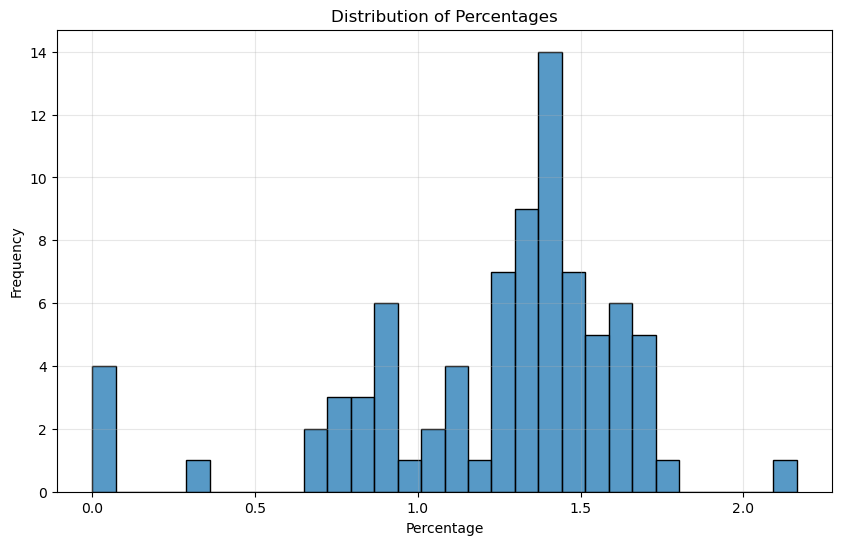

In [26]:
# using seaborn (more stylish)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x="saliency_ratio_1", bins=30)
plt.title("Distribution of Percentages")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

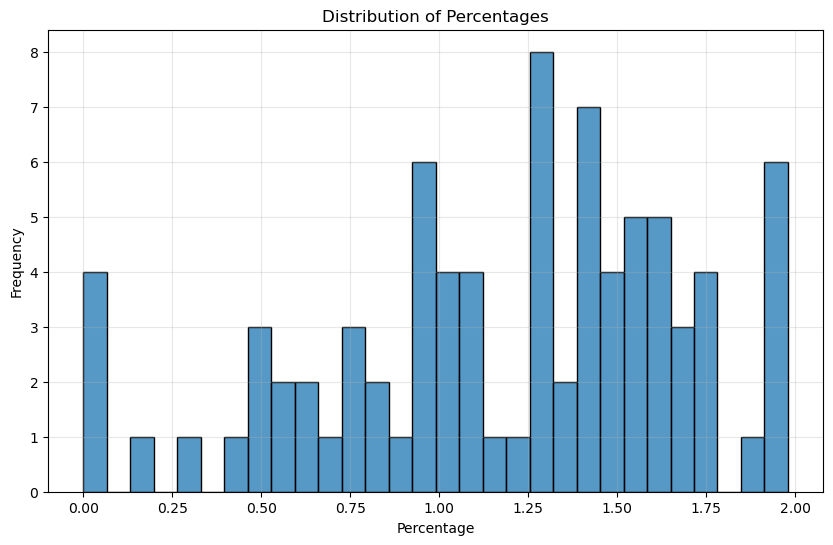

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x="saliency_ratio_2", bins=30)
plt.title("Distribution of Percentages")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

## image counts analysis